### [UTD-MHAD: "UTD-MHAD: A Multimodal Dataset for Human Action Recognition utilizing a Depth Camera and a Wearable Inertial Sensor", 2015](http://www.utdallas.edu/~kehtar/UTD-MHAD.html)

* nb of subjects: 8
* 27 different actions: (1) right arm swipe to the left, (2) right arm swipe to the right, (3) right hand wave, (4) two hand front clap, (5) right arm throw, (6) cross arms in the chest, (7) basketball shoot, (8) right hand draw x, (9) right hand draw circle (clockwise), (10) right hand draw circle (counter clockwise), (11) draw triangle, (12) bowling (right hand), (13) front boxing, (14) baseball swing from right, (15) tennis right hand forehand swing, (16) arm curl (two arms), (17) tennis serve, (18) two hand push, (19) right hand knock on door, (20) right hand catch an object, (21) right hand pick up and throw, (22) jogging in place, (23) walking in place, (24) sit to stand, (25) stand to sit, (26) forward lunge (left foot forward), (27) squat (two arms stretch out).
* labeled and segmented data: 861 data sequences, 3D skeleton joint positions

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import glob
import re

from IPython.display import HTML

#%matplotlib inline
%matplotlib notebook

In [2]:
PATH = 'data/UTD/*.mat'

In [3]:
# Definition of some variables
id_to_jnt = ['head', 'shoulder_center', 'spine', 'hip_center', 'left_shoulder', 'left_elbow', 'left_wrist',
             'left_hand', 'right_shoulder', 'right_elbow', 'right_wrist', 'right_hand', 'left_hip', 'left_knee',
             'left_ankle', 'left_foot', 'right_hip', 'right_knee', 'right_ankle', 'right_foot']
jnt_to_id = {name: idx for idx,name in enumerate(id_to_jnt)}
id_to_action = ['Swipe left', 'Swipe right', 'Wave', 'Clap', 'Throw',  'Arm cross', 'Basketball shoot', 
                'Draw X', 'Draw circle (clockwise)', 'Draw circle (counter clockwise)',
                'Draw triangle', 'Bowling', 'Boxing', 'Baseball swing', 'Tennis swing',
                'Arm curl', 'Tennis serve', 'Push', 'Knock', 'Catch', 'Pickup and throw',
                'Jog', 'Walk', 'Sit to stand', 'Stand to sit', 'Lunge', 'Squat']
action_to_id = {name: idx for idx,name in enumerate(id_to_action)}
Nj = len(id_to_jnt) # 20

# Load all the data
files = glob.glob(PATH)
data = [sio.loadmat(f)['d_skel'] for f in files] # list of shape Njx3xT
N = len(data)
print("Nb of demos: %d" % len(data))
Ts = np.array([d.shape[2] for d in data])
print("Min T: %d" % np.min(Ts))
print("Max T: %d" % np.max(Ts))

Nb of demos: 861
Min T: 41
Max T: 125


<IPython.core.display.Javascript object>


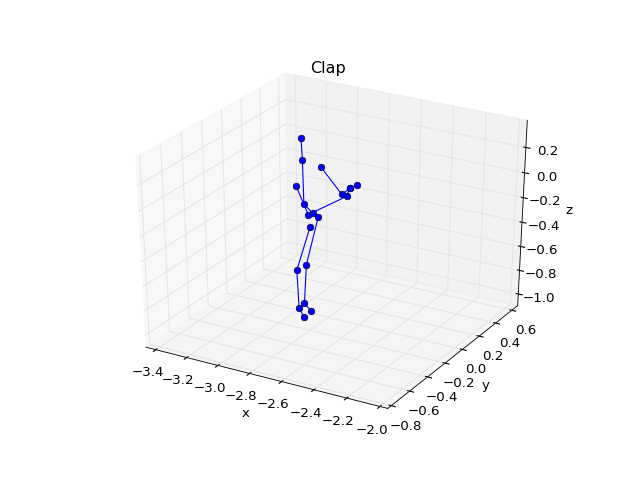

In [4]:
# Select a sequence
idx = np.random.randint(0, N)
X = np.copy(data[idx])
T = X.shape[2]
title_idx = int(re.findall(r'a[0-9]+', files[idx])[0][1:]) - 1

# Get trajectory of one end-effector (x,y,z)
#x,y,z = X[jnt_to_id['right_wrist']] # left_arm
#x,y,z = z,x,y
#T = len(x)

# Rescaling such that the skeleton it is in the right proportion and at the middle
xmin, xmax = X[:,2].min(), X[:,2].max()
ymin, ymax = X[:,0].min(), X[:,0].max()
zmin, zmax = X[:,1].min(), X[:,1].max()
x_len, y_len, z_len = (xmax - xmin), (ymax - ymin), (zmax - zmin)
max_len = max([x_len, y_len, z_len])
xmin, xmax = xmin + (x_len - max_len)/2., xmin + (x_len + max_len)/2.
ymin, ymax = ymin + (y_len - max_len)/2., ymin + (y_len + max_len)/2.
zmin, zmax = zmin + (z_len - max_len)/2., zmin + (z_len + max_len)/2.

# Plot trajectory
fig = plt.figure()
ax = fig.gca(projection='3d')

def init():
    ax.set_title(id_to_action[title_idx])
    ax.set_xlabel('x')
    #ax.set_xlim(xmin, xmax)
    ax.set_xlim(-xmax, -xmin)
    ax.set_ylabel('y')
    ax.set_ylim(ymin, ymax)
    ax.set_zlabel('z')
    ax.set_zlim(zmin, zmax)
    #ax.scatter(x[0], y[0], z[0], marker='o')
    return fig,

def animate(i):
    #ax.view_init(elev=10., azim=i)
    ax.scatter(-x[i], y[i], z[i], marker='o')
    return fig,
    
def animate_skeleton(i):
    ax.clear()
    init()
    #ax.scatter(X[:,2,i], X[:,0,i], X[:,1,i], marker='o', c='b')
    for j in range(0,20,4):
        ax.plot(-X[j:j+4,2,i], X[j:j+4,0,i], X[j:j+4,1,i], marker='o', c='b')
    return fig,
    

# Animate
#anim = animation.FuncAnimation(fig, animate, init_func=init,
#                               frames=T, interval=20, blit=True)
anim = animation.FuncAnimation(fig, animate_skeleton, init_func=init,
                               frames=T, interval=20, blit=True)

plt.show()

In [ ]:
# create video with HTML
#HTML(anim.to_html5_video())